In [1]:
import numpy as np
import tensorflow as tf

# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors 

import ipysh
import Hunch_utils  as Htls
import Hunch_lsplot as Hplt
import Hunch_tSNEplot as Hsne

# Load the TensorBoard notebook extension
%load_ext tensorboard

%aimport models.AEFIT5
%aimport models.AEFIT6
%aimport models.base
%aimport Dataset_QSH
# !pip install livelossplot --user


Hunch models imported
reload set for module  Hunch_utils
reload set for module  Dummy_g1data
reload set for module  Hunch_lsplot
reload set for module  Hunch_tSNEplot


In [3]:
qsh = Dataset_QSH.Dataset_QSH()
file = ipysh.abs_builddir+'/te_db_1_fix.npy'
qsh.load(file)

qsh.set_null(np.nan)

In [4]:
import seaborn as sns
qsh.rebalance_prel(20)



KMeans(n_clusters=20, random_state=0)

/usr/local/anaconda/3/2020.01/3.7.4/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


this should be shriked to:  18


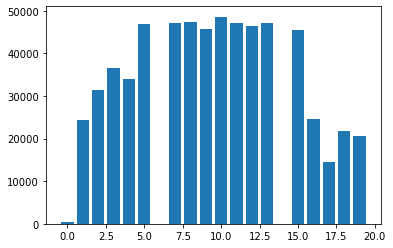

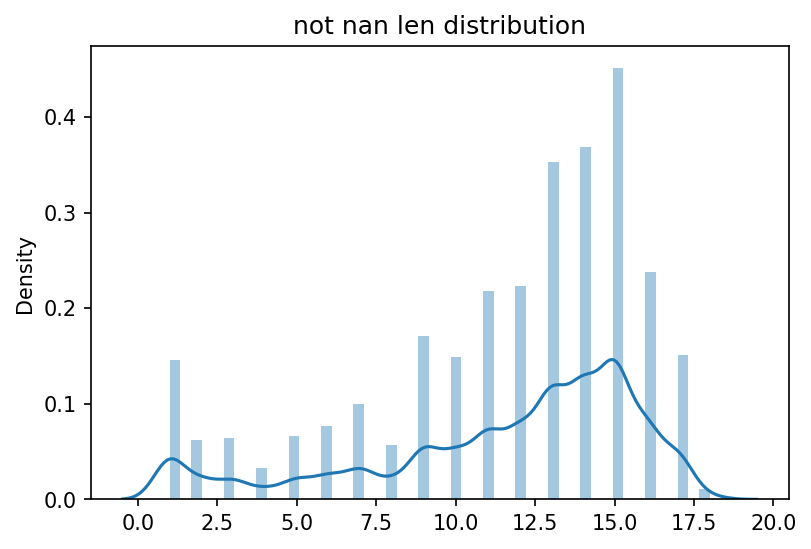

In [5]:
qsh.plot_hisotgrams()

# Shrink to dim = 15

In [6]:
qsh = Dataset_QSH.Dataset_QSH()
import os
file = ipysh.abs_builddir+'/te_db_fix_r15_shuffle.npy'
if os.path.isfile(file):
    qsh.load(file)
# else:
#     qsh.load(ipysh.abs_builddir+'/te_db_1.npy')    
#     qsh.rebalance_prel(15)
#     qsh.save(ipysh.abs_builddir+'/te_db_r15.npy')
    
# qsh.shuffle()
# qsh.filter_number_set(15)
# qsh.clean_up_poorcurves(5)
qsh.dim = 15
qsh.set_null(np.nan)
qsh.set_normal_positive()
# qsh.unbias_mean(0.5, 'te')
# qsh.set_normal_positive()

# print("QSH rebalanced 15 points size: ", len(qsh))

# qsh.set_null(np.nan)
# qsh.clip_values(0.1,0.6)
# qsh.set_normal_positive()

## VAE AEFIT4

This is the Analytical way to compute KL term ... beta is applied to KL

In [7]:
vae = models.AEFIT5.AEFIT5(latent_dim=2, feature_dim=30, dprate=0., scale=1, beta=0.0, geometry=[20,20,10,10])

AEFIT5 ready:


In [8]:
p = Hplt.LSPlotBokeh()
p.set_model(vae)
p.set_data(qsh, counts=3000)
p.plot_notebook(notebook_url='http://rat2.rfx.local:8889')

/usr/local/anaconda/3/2020.01/3.7.4/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/amorosetti/devel/rfx-hunch/src/Tprofile_read/Hunch_lsplot.py:297: RuntimeWarning: invalid value encountered in true_divide
  return (data - m) / (M-m)


Loading BokehJS ...

In [9]:
# models.base.train(vae, qsh, batch=200, epoch=1, loss_factor=1e-3)
ds = qsh.ds_array.map(lambda x,y: (x,x))
fit = lambda: vae.fit(ds.skip(5000).cache().batch(100, drop_remainder=True), validation_data=ds.take(5000).cache().batch(100), epochs=100, shuffle=False)
models.base.fn_thread(vae, fit).control_panel()

Button(button_style='success', description='start', style=ButtonStyle())

Button(button_style='primary', description='watch', style=ButtonStyle())

Button(description='clear log', style=ButtonStyle())

Output()